In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import os
import numpy as np
import pyaudio  #録音機能を使うためのライブラリ
import wave     #wavファイルを扱うためのライブラリ
import soundfile
from scipy.io.wavfile import read, write

from librosa_funcs import load_wave_data, calculate_melsp, show_wave, show_melsp

target voice melsp plot
(95852,) 16000 float32
wave size:(95852,)
melsp size:(128, 749)
samping rate:16000


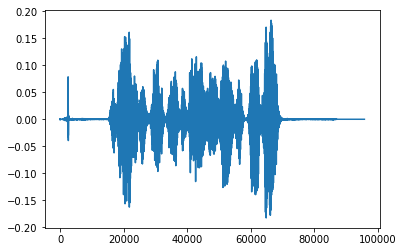

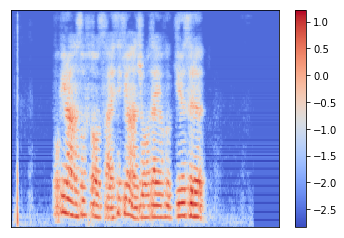

In [3]:
print('target voice melsp plot')
target_filename = 'recitation059.wav'
audio_dir = '../datasets/target_wav'
x,fs = load_wave_data(audio_dir, file_name=target_filename)
print(x.shape, fs, x.dtype)
melsp = calculate_melsp(x, n_fft=1024, hop_length=128)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x.shape, melsp.shape, fs))
show_wave(x)
show_melsp(melsp, fs)
ipd.Audio(x, rate=fs)

In [97]:
print('recodeding voice')
input_filename = target_filename
WAV_FILENAME = os.path.join('../datasets/input_wav', input_filename)
import sys
import pyaudio  
import wave 
import time
def audio_device_id():
    iAudio = pyaudio.PyAudio()
    for x in range(0, iAudio.get_device_count()): 
        print(iAudio.get_device_info_by_index(x))

iDeviceIndex = 0 
RECORD_SECONDS = 6
def record_audio(wav_file_name="sample1.wav"):
    
    WAVE_OUTPUT_FILENAME = wav_file_name

    #基本情報の設定
    FORMAT = pyaudio.paInt16 #音声のフォーマット
    CHANNELS = 1             #モノラル
    RATE = 44100             #サンプルレート
    CHUNK = 2**11            #データ点数
    audio = pyaudio.PyAudio() #pyaudio.PyAudio()

    stream = audio.open(format=FORMAT, channels=CHANNELS,
            rate=RATE, input=True,
            input_device_index = iDeviceIndex, #録音デバイスのインデックス番号
            frames_per_buffer=CHUNK)

    #--------------録音開始---------------

    print ("recording...")
    frames = []
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)


    print ("finished recording")

    #--------------録音終了---------------

    stream.stop_stream()
    stream.close()
    audio.terminate()

    waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    waveFile.setnchannels(CHANNELS)
    waveFile.setsampwidth(audio.get_sample_size(FORMAT))
    waveFile.setframerate(RATE)
    waveFile.writeframes(b''.join(frames))
    waveFile.close()
    
if __name__=='__main__':
    record_audio(wav_file_name=WAV_FILENAME)

recodeding voice
recording...
finished recording


show N bit
int16 bit
plot
(95852,) 16000 float32
wave size:(95852,)
melsp size:(128, 749)
samping rate:16000


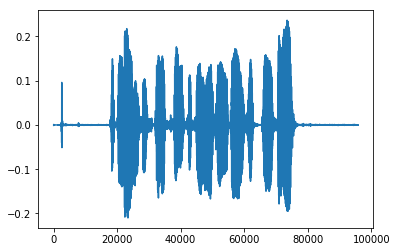

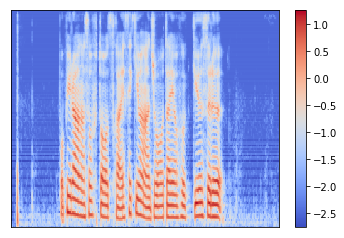

In [98]:
"""recoded voice check"""

print('show N bit')
fs, data = read(os.path.join('../datasets/input_wav', input_filename))
print(data.dtype, 'bit')

print('plot')
x,fs = load_wave_data('../datasets/input_wav', file_name=input_filename)
print(x.shape, fs, x.dtype)
melsp = calculate_melsp(x)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x.shape, melsp.shape, fs))
show_wave(x)
show_melsp(melsp, fs)
ipd.Audio(x, rate=fs)

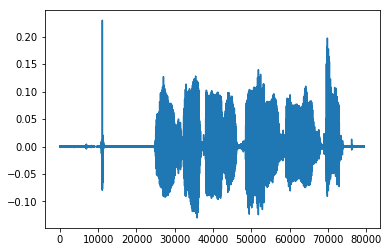

In [33]:
def shift_sound(x, rate=0.99):
    return np.roll(x, int(len(x)//rate))
xs = shift_sound(x, rate=0.09)
show_wave(xs)
ipd.Audio(xs, rate=fs)